In [ ]:
from config import api_key

In [8]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from scipy.stats import linregress

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.85, 51.51, 59.91, 39.91, 19.01, 14.6, 40.71, 47.61, 32.77, 25.05]
The temperature information received is: [20.63, 17.95, 13.75, 19.47, 26, 25, 20.15, 20.16, 28.09, 29.55]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.85,20.63
1,London,51.51,17.95
2,Oslo,59.91,13.75
3,Beijing,39.91,19.47
4,Mumbai,19.01,26.00
5,Manila,14.60,25.00
6,New York,40.71,20.15
7,Seattle,47.61,20.16
8,Dallas,32.77,28.09
9,Taipei,25.05,29.55


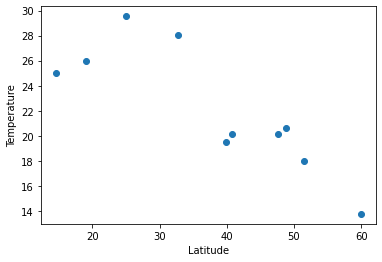

In [19]:
# Create a Scatter Plot for temperature vs. latitude
x_values = weather_data['lat']
y_values = weather_data['temp']
plt.scatter(x_values, y_values) 
plt.xlabel("Latitude") 
plt.ylabel("Temperature") 
plt.show() 

In [15]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
regress_values

0    19.049684
1    18.308472
2    15.967802
3    21.540826
4    27.364635
5    28.593487
6    21.317905
7    19.395212
8    23.530395
9    25.681582
Name: lat, dtype: float64

In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
line_eq

'y = -0.28x + 32.66'

The r-value is: 0.7057816116168852


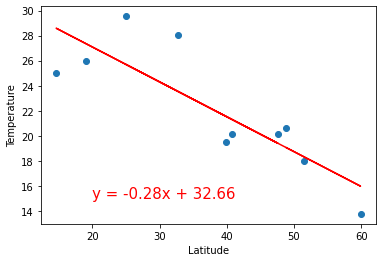

In [18]:
# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [20]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
florence_lat = 43.77
florence_predicted_temp = round(slope * florence_lat + intercept, 2)
print(f"The predicted temperature for Florence will be {florence_predicted_temp}.")

The predicted temperature for Florence will be 20.47.


In [21]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
response

{'coord': {'lon': 11.25, 'lat': 43.77},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 27.31,
  'feels_like': 25.81,
  'temp_min': 26.67,
  'temp_max': 28,
  'pressure': 1017,
  'humidity': 42},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 20},
 'clouds': {'all': 51},
 'dt': 1600194306,
 'sys': {'type': 1,
  'id': 6804,
  'country': 'IT',
  'sunrise': 1600145678,
  'sunset': 1600190750},
 'timezone': 7200,
 'id': 3176959,
 'name': 'Florence',
 'cod': 200}

In [22]:
florence_actual_temp = response["main"]["temp"]
print(f"The actual temperature of Florence is {florence_actual_temp}.")

The actual temperature of Florence is 27.31.
